In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [5]:
stereo_to_antistereo_dists = None
stereo_to_unrelated_dists = None
antistereo_to_unrelated_dists = None
data_size = 2100

PATH_TO_DATA = "/Users/keshav/Desktop/Github/TopoLearn/data/experiment2/"

with open(PATH_TO_DATA + "stereo_to_antistereo_dists_" + str(data_size) + ".npy", "rb") as f:
    stereo_to_antistereo_dists = np.load(f)
with open(PATH_TO_DATA + "stereo_to_unrelated_dists_" + str(data_size) + ".npy", "rb") as f:
    stereo_to_unrelated_dists = np.load(f)
with open(PATH_TO_DATA + "antistereo_to_unrelated_dists_" + str(data_size) + ".npy", "rb") as f:
    antistereo_to_unrelated_dists = np.load(f)

print("stereo_to_antistereo_dists shape: ", stereo_to_antistereo_dists.shape)
print("stereo_to_antistereo_dists shape: ", stereo_to_antistereo_dists.shape)
print("antistereo_to_unrelated_dists shape: ", antistereo_to_unrelated_dists.shape)


stereo_to_antistereo_dists shape:  (12, 2, 2100)
stereo_to_antistereo_dists shape:  (12, 2, 2100)
antistereo_to_unrelated_dists shape:  (12, 2, 2100)


In [6]:
def random_sample_average(data, p = 0.7):
    
    data_points_0 = np.mean(data, axis = 0)[0]
    data_points_1 = np.mean(data, axis = 0)[1]
    
    sample_0 = np.random.choice(data_points_0, size = int(len(data_points_0) * p), replace = False)
    sample_1 = np.random.choice(data_points_1, size = int(len(data_points_1) * p), replace = False)
    
    sample_mean_0 = np.mean(sample_0)
    sample_mean_1 = np.mean(sample_1)
    
    return sample_mean_0, sample_mean_1
    
    

/var/folders/cj/s34pgqr548d2r9w6h1q9c8cm0000gn/T/ipykernel_6002/1577979116.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  normalized_0 = (0 - mean_0) / std_0
/var/folders/cj/s34pgqr548d2r9w6h1q9c8cm0000gn/T/ipykernel_6002/1577979116.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  normalized_1 = (0 - mean_1) / std_1


Mean 0:  0.0015044244214005064
STD 0:  0.0
Mean 1:  5.362358084575768e-05
STD 1:  0.0
P(mean_0 >= 0):  1.0
P(mean_1 >= 0):  1.0


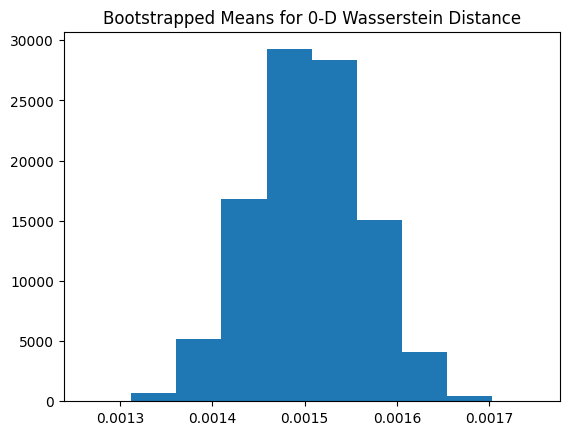

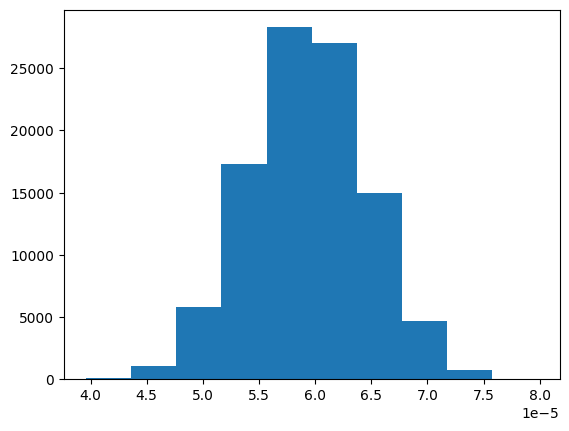

In [7]:
numSamples = 100000

sample_means_0 = []
sample_means_1 = []

for i in range(numSamples):
    sample_mean_0, sample_mean_1 = random_sample_average(antistereo_to_unrelated_dists, p = 0.5)
    
    sample_means_0.append(sample_mean_0)
    sample_means_1.append(sample_mean_1)


mean_0 = np.mean(sample_means_0)
mean_1 = np.mean(sample_mean_1)

std_0 = np.std(sample_mean_0)
std_1 = np.std(sample_mean_1)

dist = norm()

normalized_0 = (0 - mean_0) / std_0
normalized_1 = (0 - mean_1) / std_1
p_value_0 = 1 - dist.cdf(normalized_0)
p_value_1 = 1 - dist.cdf(normalized_1)

print("Mean 0: ", mean_0)
print("STD 0: ", std_0)

print("Mean 1: ", mean_1)
print("STD 1: ", std_1)



print("P(mean_0 >= 0): ", p_value_0)
print("P(mean_1 >= 0): ", p_value_1)


plt.figure()
plt.title("Bootstrapped Means for 0-D Wasserstein Distance")
plt.hist(sample_means_0)
plt.show()
plt.figure()
plt.hist(sample_means_1)
plt.show()


In [8]:
def generate_layer_plots(data):
    plt.figure()
    for layer_num in range(12):
        plt.hist(data[layer_num][0], label = "Layer " + str(layer_num))
    plt.legend()
    plt.show()

    plt.figure()
    for layer_num in range(12):
        plt.hist(data[layer_num][1], label = "Layer " + str(layer_num))
    plt.legend()
    plt.show()

def generate_average_compare_dist_plots(data1, data2, data3, name1, name2, name3):
    layerAverage1 = np.mean(data1, axis = 0)
    layerAverage2 = np.mean(data2, axis = 0)
    layerAverage3 = np.mean(data3, axis = 0)
    
    plt.figure()
    plt.title("0-D Wasserstein Dist | Num Samples: " + str(len(layerAverage1[0])))
    plt.hist((layerAverage1[0], layerAverage2[0], layerAverage3[0]), label = (name1, name2, name3))
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.title("1-D Wasserstein Dist | Num Samples: " + str(len(layerAverage1[0])))
    plt.hist((layerAverage1[1], layerAverage2[1], layerAverage3[1]), label = (name1, name2, name3))

    plt.legend()
    plt.show()

def generate_layer_compare_dist_plots(data1, data2, data3, name1, name2, name3):
    
    for layer_num in range(12):
        print("Layer " + str(layer_num))
        print("*" * 100)
        plt.figure()
        plt.title("0-D Wasserstein Dist | Num Samples: " + str(len(data1[layer_num][0])))
        plt.hist((data1[layer_num][0], data2[layer_num][0], data3[layer_num][0]), label = (name1, name2, name3))
        plt.legend()
        plt.show()
        
        plt.figure()
        plt.title("1-D Wasserstein Dist | Num Samples: " + str(len(data1[layer_num][1])))
        plt.hist((data1[layer_num][1], data2[layer_num][1], data3[layer_num][1]), label = (name1, name2, name3))

        plt.legend()
        plt.show()
    
    

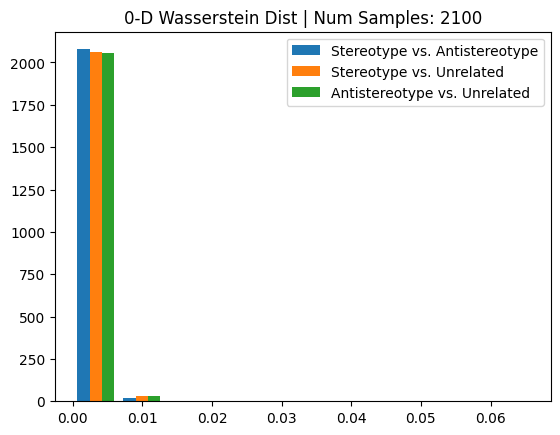

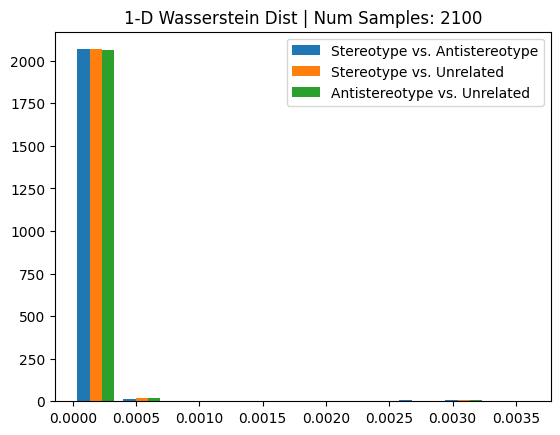

In [9]:
generate_average_compare_dist_plots(stereo_to_antistereo_dists, stereo_to_unrelated_dists, antistereo_to_unrelated_dists, "Stereotype vs. Antistereotype", "Stereotype vs. Unrelated", "Antistereotype vs. Unrelated")

Layer 0
****************************************************************************************************


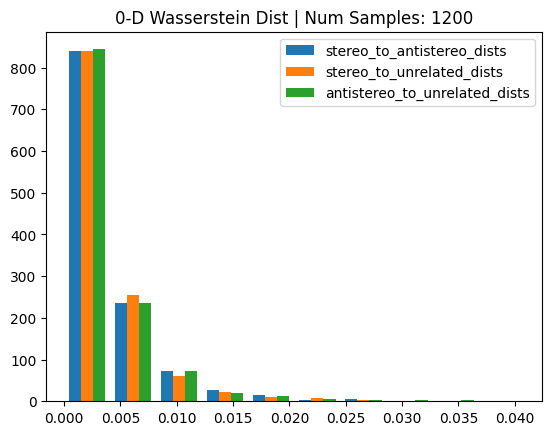

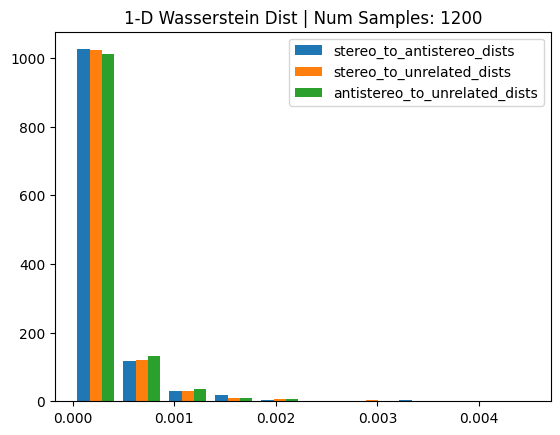

Layer 1
****************************************************************************************************


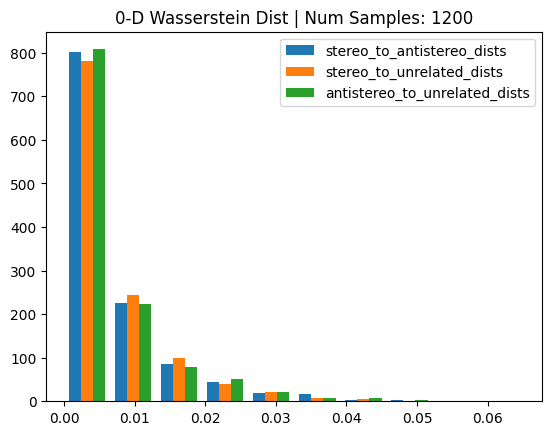

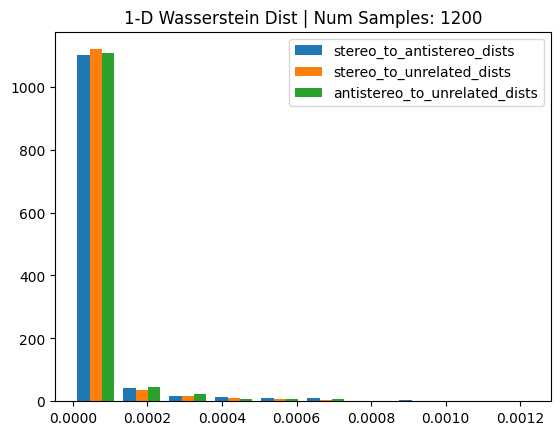

Layer 2
****************************************************************************************************


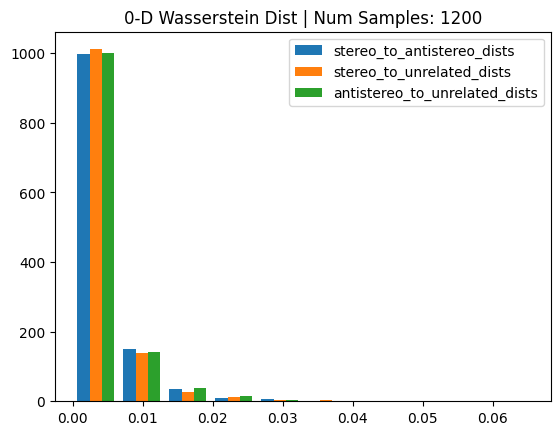

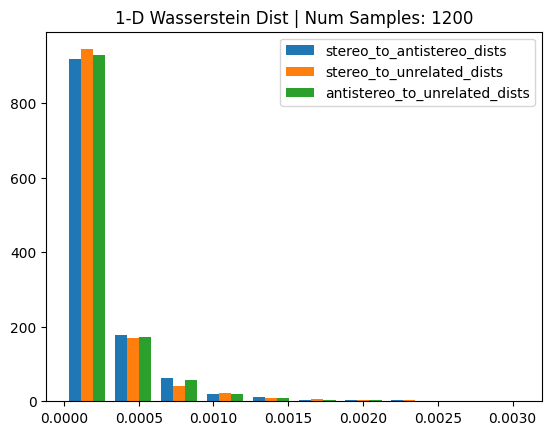

Layer 3
****************************************************************************************************


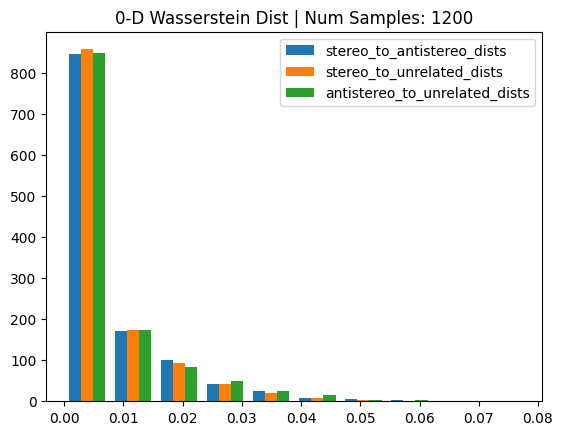

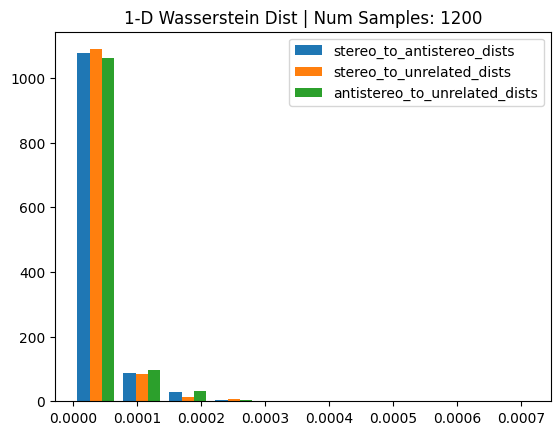

Layer 4
****************************************************************************************************


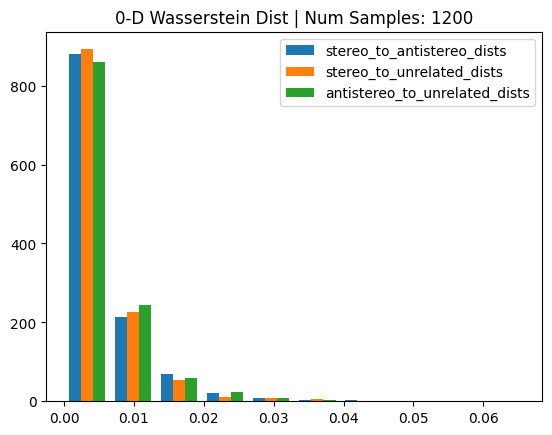

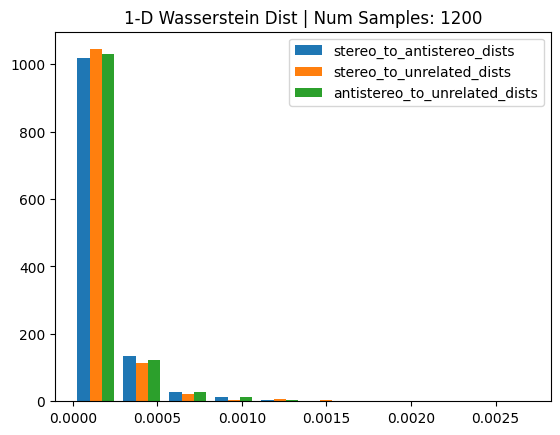

Layer 5
****************************************************************************************************


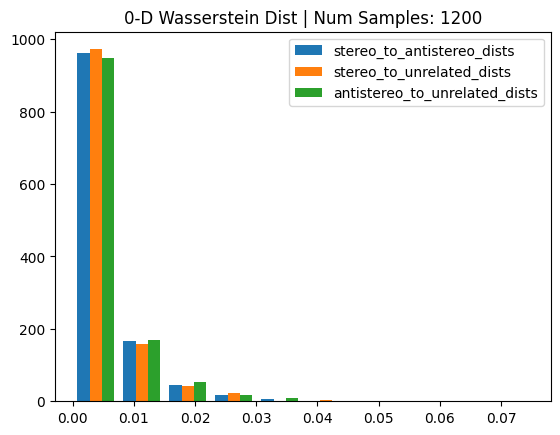

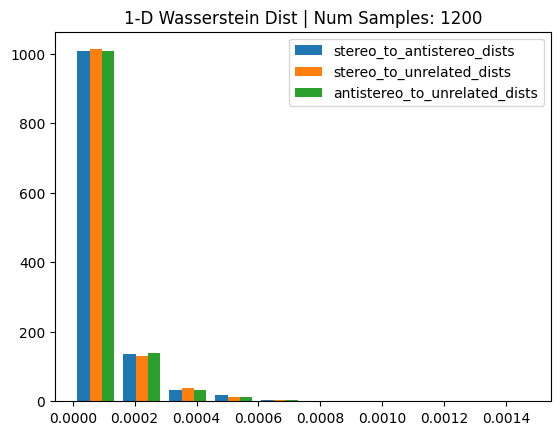

Layer 6
****************************************************************************************************


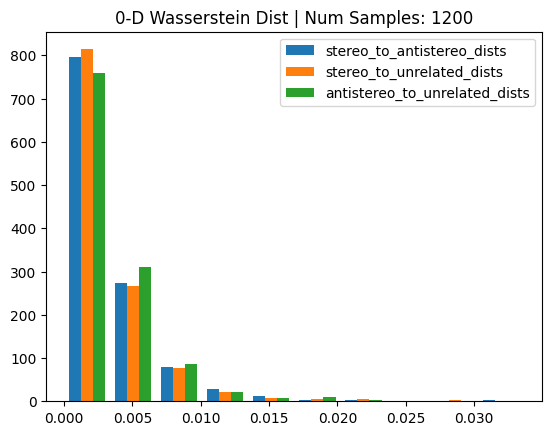

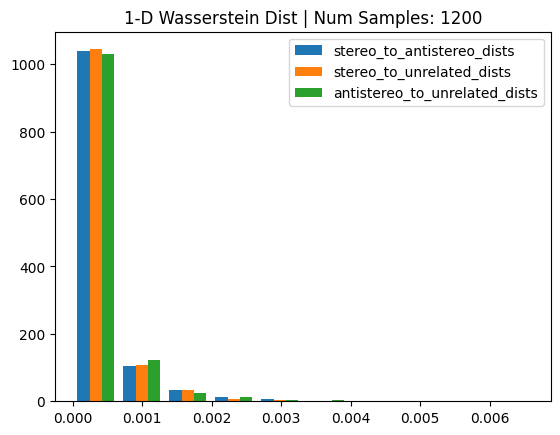

Layer 7
****************************************************************************************************


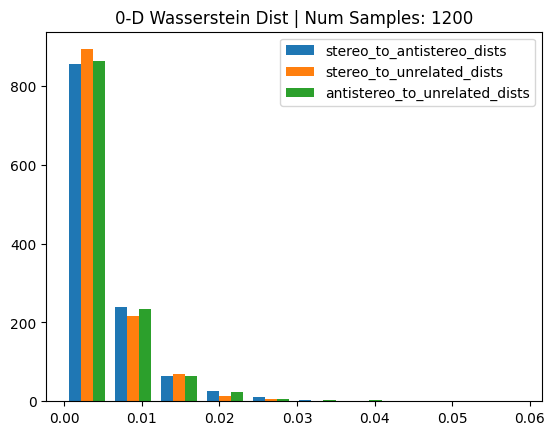

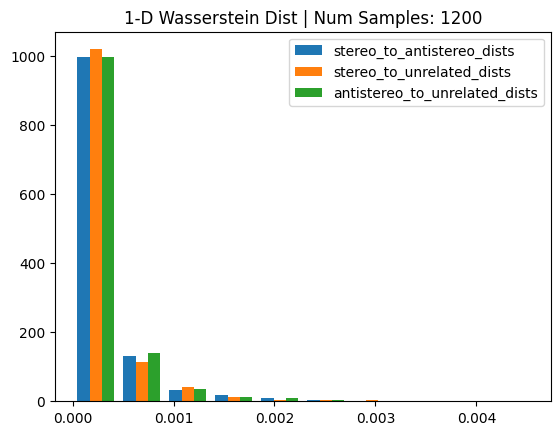

Layer 8
****************************************************************************************************


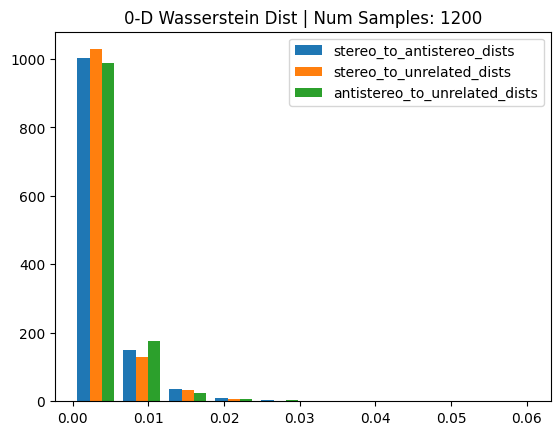

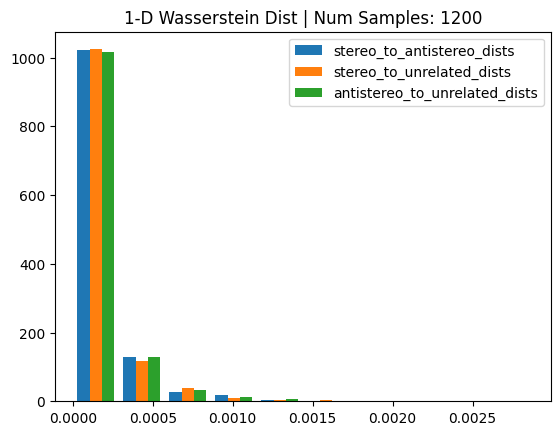

Layer 9
****************************************************************************************************


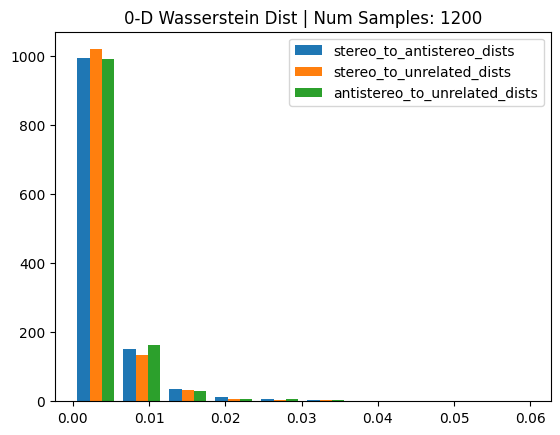

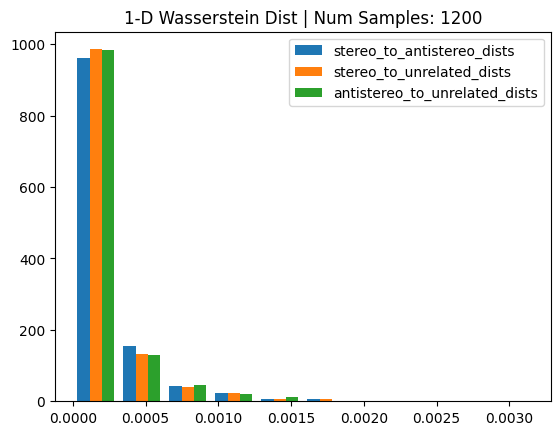

Layer 10
****************************************************************************************************


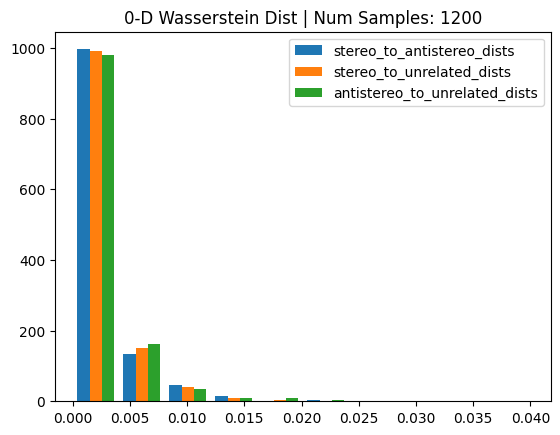

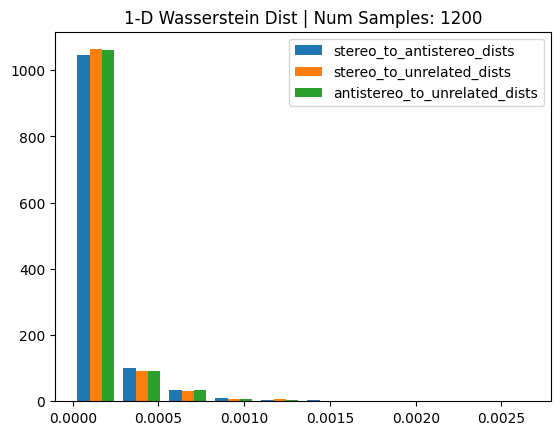

Layer 11
****************************************************************************************************


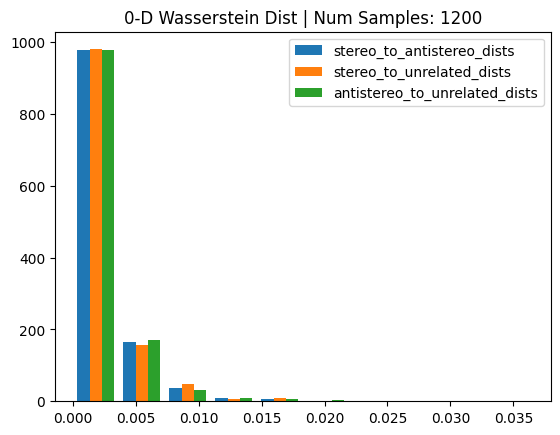

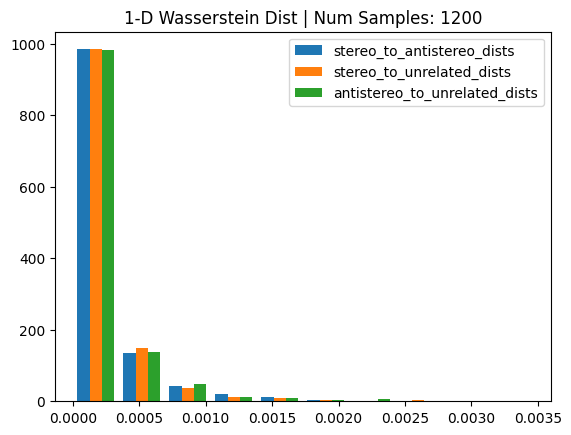

In [7]:
generate_layer_compare_dist_plots(stereo_to_antistereo_dists, stereo_to_unrelated_dists, antistereo_to_unrelated_dists, "stereo_to_antistereo_dists", "stereo_to_unrelated_dists", "antistereo_to_unrelated_dists")

In [1]:
def empirical_dist(x, set):

    return np.sum(set <= x) / len(set)

In [4]:
empirical_dist(2, np.array([1, 2, 3]))

0.6666666666666666